<a href="https://colab.research.google.com/github/tonyjosephsebastians/100DaysMLCode/blob/main/Gaussian_process_regression__Clustering_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gaussian
we can estimate the missing data points!

predict the future! If we guess what happened before,
we can guess what will happen in the future

GPR is something that reads the data points and learns them; it uses the Gaussian Process Regression to learn, and estimate the missing data points





In [6]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

import numpy as np
import matplotlib.pyplot as plt

In [19]:
t= 10 * np.random.normal(0,1,70)
y = 10*(-t**2) + np.random.normal(-100,100,70)
t = t.reshape(-1,1)
y = y.reshape(-1,1)

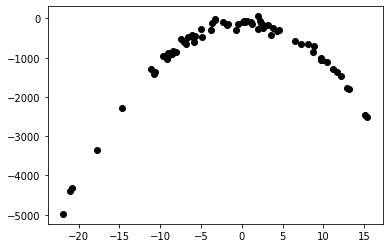

In [20]:
plt.scatter(t,y,color='black')

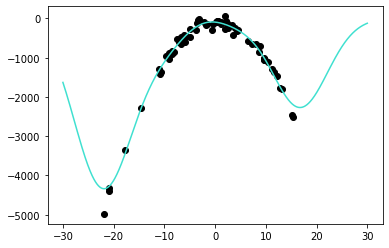

In [26]:
# GaussianProcessRegressor
# define kernel 1 for GPR

v =0.5
kernal = v*RBF() + WhiteKernel()
sigma = 0.4
GPR = GaussianProcessRegressor(kernel=kernal,alpha=2*sigma,n_restarts_optimizer=10)
GPR.fit(t,y)
x_plot = np.linspace(-30,30,100000)[:,None]
y_pred = GPR.predict(x_plot)
plt.scatter(t,y,color='black')
plt.plot(x_plot, y_pred, color='turquoise',
         label='GPR')

Let us imagine x = np.linspace(-5, 12, 100)

and y = np.sin(x) + np.random.normal(-0.1,0.1,70)

Give me a GPR based model that estimates the curve behind the 100 data points I just mentioned?

We will come back at 9 am.

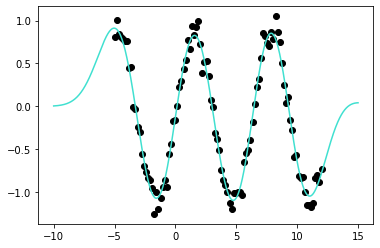

In [91]:
x = np.linspace(-5, 12, 100)
y = np.sin(x) + np.random.normal(-0.1,0.1,100)

x = x.reshape(-1,1)
y = y.reshape(-1,1)


v = 0.5
kernel1 = v*RBF() + WhiteKernel() 
sigma_n = 0.4
GPR = GaussianProcessRegressor(kernel=kernel1, alpha=sigma_n**2, n_restarts_optimizer=10)
GPR.fit(x,y)

X_plot = np.linspace(-10, 15, 10000)[:, None]

y_pred1 = GPR.predict(X_plot)
plt.scatter(x,y, color="black")
plt.plot(X_plot, y_pred1, color='turquoise',
         label='GPR')

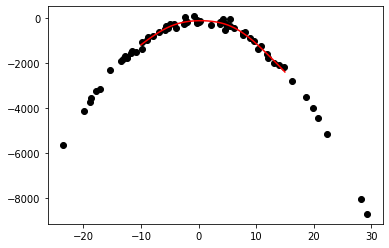

In [92]:
# define kernel for KRR


t=10*np.random.normal(0,1,70)
y=10*(-t**2)+np.random.normal(-100,100,70)

t = t.reshape(-1,1)
y = y.reshape(-1,1)


param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}

kr = GridSearchCV(KernelRidge(), param_grid=param_grid)
kr.fit(t, y)
y_kr = kr.predict(X_plot)

plt.scatter(t,y, color="black")
plt.plot(X_plot, y_kr, color='red',
         label='KRR')

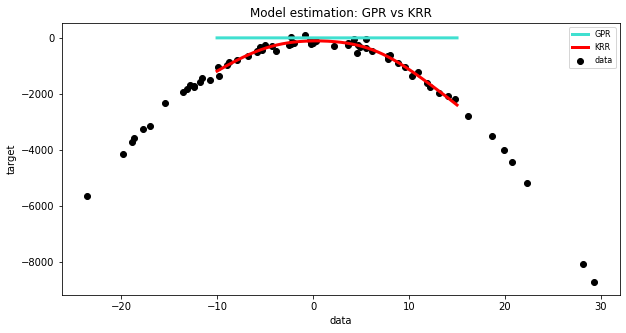

In [93]:

plt.figure(figsize=(10, 5))
lw = 3
plt.scatter(t, y, c='k', label='data')

plt.plot(X_plot, y_pred1, color='turquoise', lw=lw,
         label='GPR')

plt.plot(X_plot, y_kr, color='red', lw=lw,
         label='KRR')

plt.xlabel('data')
plt.ylabel('target')

plt.title("Model estimation: GPR vs KRR")
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()

If data is as of the following:

x = np.linspace(-5, 12, 100)

y = np.sin(x) + np.random.normal(-0.1,0.1,100)

x = x.reshape(-1,1)

y = y.reshape(-1,1)

Then estimate the curve behind the data points with both KRR and GPR methods. And visualize the results (curves and black data points.)



In [94]:
x = np.linspace(-5, 12, 100)

y = np.sin(x) + np.random.normal(-0.1,0.1,100)

x = x.reshape(-1,1)

y = y.reshape(-1,1)

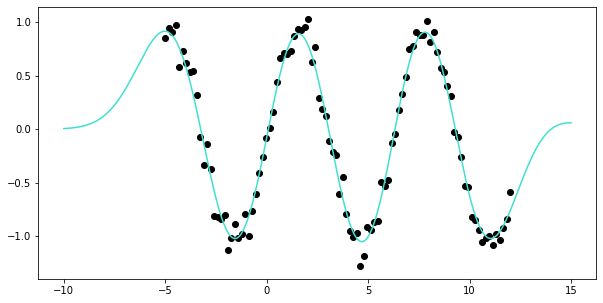

In [105]:
v = 0.5
kernel1 = v*RBF() + WhiteKernel() 
sigma_n = 0.4
GPR = GaussianProcessRegressor(kernel=kernel1, alpha=sigma_n**2, n_restarts_optimizer=10)
GPR.fit(x,y)

X_plot = np.linspace(-10, 15, 1000000)[:, None]

y_pred = GPR.predict(X_plot)
plt.figure(figsize=(10,5))
plt.scatter(x,y, color="black")
plt.plot(X_plot, y_pred, color='turquoise',
         label='GPR')

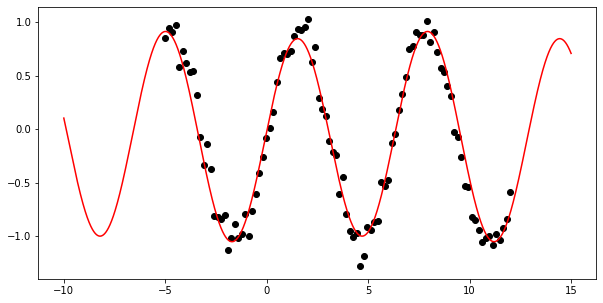

In [106]:
#krr
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}

krr = GridSearchCV(KernelRidge(), param_grid=param_grid)
krr.fit(x, y)
y_krr = krr.predict(X_plot)
plt.figure(figsize=(10,5))
plt.scatter(x,y, color="black")
plt.plot(X_plot, y_krr, color='red',
         label='KRR')

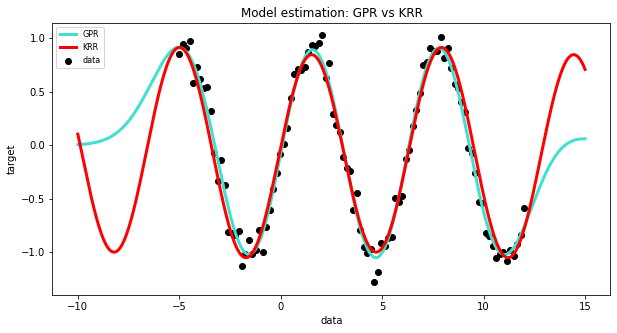

In [107]:
plt.figure(figsize=(10, 5))
lw = 3
plt.scatter(x, y, c='k', label='data')

plt.plot(X_plot, y_pred, color='turquoise', lw=lw,
         label='GPR')

plt.plot(X_plot, y_krr, color='red', lw=lw,
         label='KRR')

plt.xlabel('data')
plt.ylabel('target')

plt.title("Model estimation: GPR vs KRR")
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()

Kmeans

What is the main difference between classification and clustering?

In clustering,we group the data points  with similiar distance and in classification , predict the label of data points

In [112]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans



In [113]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [115]:
x_ = iris.data
y_ =iris.target

In [116]:
#kmeas importing
km = KMeans(n_clusters=3,n_jobs=4,random_state=21)
#kmeans to fit the data
km.fit(x_)
#centers
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [117]:
#Lbales
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [119]:
#Makeing the clusters
output_list =[]
for i in range(x_.shape[0]):
  output_list.append(km.predict([x_[i,:]]))

output_list


[array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([1], 

In [131]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train.shape

(60000, 28, 28)

In [137]:
from sklearn import svm
classfifier = svm.SVC()
X_train = X_train.reshape(X_train.shape[0],-1)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [139]:
X_train = X_train[0:1000,:]

classfifier.fit(X_train, Y_train[0:1000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Reshape teh training and test 

In [148]:
X_test = X_test.reshape(X_test.shape[0],-1)
X_test = X_test[0:1000,:]

In [158]:
p = 100
y_pred = classfifier.predict(X_test)
y_pred.shape

(1000,)

Find thwe accuracy of model

In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test[0:1000],y_pred)

0.875